# DBSCAN Clustering Algorithm Demo

This code is a demonstration from the Sci Kit Learn documentation. 
The link is below:

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Data Generation

**1.** Create synthetic clusters to do algorithm on

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1,1],[-1,-1],[1,-1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

**2.** Visualize the data

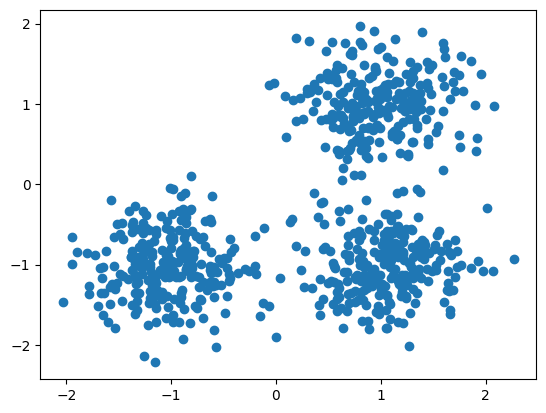

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.show()

## Compute DBSCAN

**1.** Import more libraries

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

**2.** Create a DBSCAN classifier and update the labels to match the classifier's labels

In [4]:
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

labels = db.labels_

**3.** Determine number of clusters and number of noise points

In [5]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 22


## Plot results

Core samples are labeled as large dots, non-core are small, noise is black

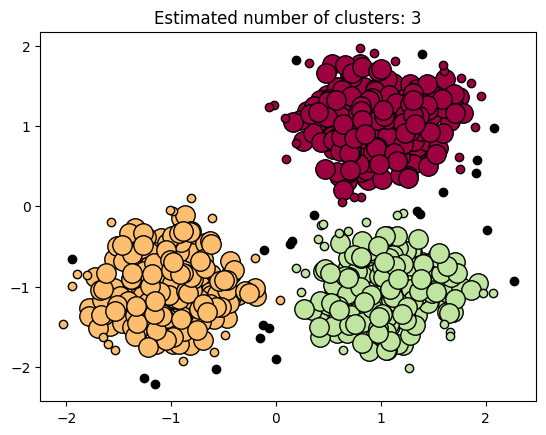

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Set class colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Make core points larger
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Make non-core points smaller
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# Plot the result
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()